# Análisis de la frecuencia cardíaca máxima registrada del corazón con respecto a la edad de un conjunto de pacientes.

<p style="text-align:justify">El presente documento pretende presentar, y buscar, alguna relación existente entre la frecuencia cardiaca máxima registrada por un conjunto de pacientes y su respectiva edad de cada uno. Y es que todos en algún momento hemos tenido la creencia, o hemos escuchado, acerca de la disminución de la frecuencia cardiaca conforme pasan los años de una persona. Es por tal motivo que uno de los propósitos es exponer aquella idea en términos probabilísticos, dando utilidad de la ya famosa regresión lineal y herramientas como Python.</p>

<p style="text-align:justify">La presente información es obtenida de la base de datos presentada por el estudiante en University of Asia Pacific, <a href="https://rashikrahman.github.io/Website/">Rashik Rahman</a>. (<a href="https://www.kaggle.com/rashikrahmanpritom/heart-attack-analysis-prediction-dataset">Click</a> para ver el link original) </p>

Dicho esto, comencemos visualizando la información con la que vamos a trabajar; y para ello comenzaremos importando los módulos que utilizaremos de Python.

In [1]:
import pandas as pd # Manejo de datos
import seaborn as sns # Creación de gráficas y visualización de datos
import matplotlib.pyplot as plt # Dependencia para crear gráficos

Posteriormente representamos parte de la información (ya que es muy extensa) en formato de tabla.

In [2]:
df = pd.read_csv('../data/heart.csv')
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


La terminología a utilizar esa la siguiente:

- Age : Edad del paciente
- Sex : Sexo del paciente
- cp : Tipo de dolor de pecho
    - Valor 1 = Angina típica
    - Valor 2 = Angina atípica
    - Valor 3 = Dolor no anginoso
    - Valor 4 = Asintomático
- trtbps : Presión arterial en reposo (en mm Hg)
- chol : Colesterol en mg / dl obtenido a través del sensor de IMC
- fbs : (azúcar en sangre en ayunas> 120 mg / dl) (1 = verdadero; 0 = falso)
- restecg : Resultados electrocardiográficos en reposo
- thalachh : Frecuencia cardíaca máxima alcanzada
- exng : Angina inducida por ejercicio (1 = sí; 0 = no)
- oldpeak : Pico anterior

<p style="text-align: justify">Una vez mencionada la terminología, veamos la distribución de los pacientes con respecto a la edad a través de un histograma.</p>

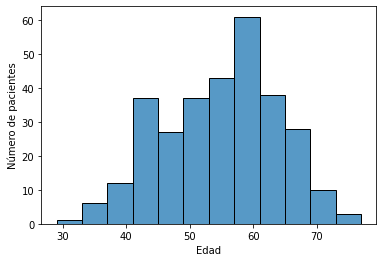

In [3]:
sns.histplot(data=df, x='age')
plt.xlabel('Edad')
plt.ylabel('Número de pacientes')
plt.show()

<p style="text-align: justify">De esta manera logramos notar que tenemos una mayor concentración de pacientes que rondan entre los 50 y 65 años.</p>

<p style="text-align: justify">Hecho esto, vamos a enfocarnos únicamente en los campos de la <b>edad</b> y la <b>frecuencia cardíaca máxima alcanzada</b>. Y para ver de manera rápida la distribución entre estos dos campos, procedemos a mostrar la gráfica de dispersión, tomando al eje x como las edades y el eje como las frecuencias cardiacas máximas registradas. </p>

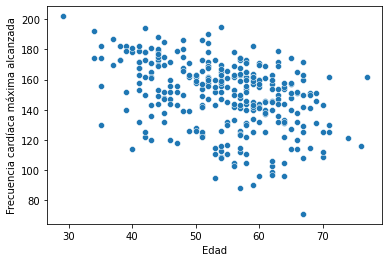

In [4]:
fig, ax = plt.subplots()
sns.scatterplot(data = df, x = 'age', y='thalachh' )
plt.xlabel('Edad')
plt.ylabel('Frecuencia cardíaca máxima alcanzada')
plt.show()

<p style="text-align: justify"><p style="text-align: justify">Para poder ver de manera menos gráfica estas distribuciones, procedemos a realizar una tabla de frecuencias con los valores anteriores.</p>

In [5]:
freq = df['thalachh'].value_counts()
df_freq = freq.to_frame()
df_freq.reset_index(inplace = True)
df_freq = df_freq.rename(columns = {'index':'Frecuencia cardíaca máxima alcanzada','thalachh':'Número de pacientes'})
df_freq

,Frecuencia cardíaca máxima alcanzada,Número de pacientes
0,162,11
1,160,9
2,163,9
3,152,8
4,173,8
...,...,...
86,202,1
87,184,1
88,121,1
89,192,1


<p style="text-align: justify"><p style="text-align: justify">Y finalmente procedemos a realizar la regresión lineal para el conjunto de datos antes mostrados, con el fin de corroborar lo mencionado al inicio de este documento. Es importante mencionar que el modelo siguiente está computarizado como un modelo de machine learning, por lo que este lleva dos etapas; la primera de ellas es una etapa de entrenamiento al modelo (líneas 6 - 12) y la segunda consiste en la aplicación de los datos completos para realizar el mejor ajuste lineal (líneas 14 - 15) a los datos a través de la regresión lineal. </p>

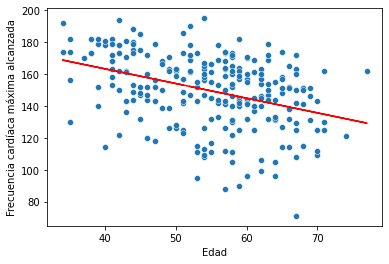

In [6]:
X = df['age'].values
Y = df['thalachh'].values

X = X.reshape(-1,1)

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2 )

from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train,Y_train)

x_flat = X_train.flatten()
y_hat = reg.predict(X_train)

fig, ax = plt.subplots()
sns.scatterplot(x=x_flat,y=Y_train)
plt.xlabel('Edad')
plt.ylabel('Frecuencia cardíaca máxima alcanzada')
plt.plot(X_train, y_hat, color = 'r')
plt.show()

<p style="text-align: justify">De esta manera, podemos corroborar que efectivamente, conforme transcurre la edad de los pacientes, se tiene una tendencia a la disminución de la frecuencia cardiaca de manera considerable. Pero también es importante hacer hincapié en que estos efectos pueden ir variando conforme a las condiciones iniciales en términos de salud, del paciente; como lo pueden ser su alimentación, su ejercitación, entre otros factores.</p>

<p style="text-align: justify">Así, a manera de conclusión, es importante concientizarse y empezar a generar un estilo de vida más saludable con el propósito de tener mejores condiciones en el futuro; y es que estas mejoras no solo conllevan beneficios propios, sino que traen consigo también beneficios sociales. El claro ejemplo de preferir el uso de la bicicleta como reemplazo al automóvil, en ciertas situaciones cotidiana, tiene impactos ambientales (a nivel sociedad) e impactos saludables (a nivel personal); esto únicamente a manera de ejemplo, pero todos sabemos que hoy en día existen cada vez existen más y nuevas formas de poder generar "multi-impactos" en diversos sectores de manera benéfica.</p>